# 회귀 Regression
> 회귀는 머신러닝에서 가장 기초적인 데이터 분석 방법 중 하나이다.
>
> 선형 회귀(Linear Regression)은 데이터의 경향성을 나타내는 하나의 직선을 예측하는 것으로 선형 회귀에서 주로 사용되는 2차원에서의 직선이란 **기울기와 y절편을 가진 좌표 평면 위 점들의 집합**이다.

* **극단치 Outlier** : 일반적인 경향에서 벗어나는 사례
    + 데이터의 일반적인 경향을 파악하기 위해서 극단치는 제거하는 것이 좋다.
* **잔차 Residual** : 데이터의 경향성을 가장 잘 설명하는 하나의 직선과 각 데이터의 차이
* **최소제곱법 Least Squared Method** : 잔차의 제곱을 최소화하는 알고리즘

<img width="458" alt="re" src="https://user-images.githubusercontent.com/28593767/112263607-eb9e0080-8cb2-11eb-80f2-4b6bb7bf9365.png">

a: -0.355834147915461 b: 15.669317743971302


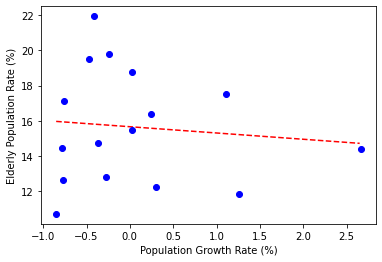

In [4]:
# Tensorflow 없이 구현

import numpy as np
import matplotlib.pyplot as plt

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, - 0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# Get mean of X and Y
x_bar = sum(X) / len(X) 
y_bar = sum(Y) / len(Y)

# Calculate a, b from least squared method
# zip(a,b) : 두 값 a, b를 하나로 묶는 메서드
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))]) 
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print('a:', a, 'b:', b)

# Get x, y data to plot a graph
line_x = np.arange(min(X), max(X), 0.01)
# y = ax + b
line_y = a * line_x + b

# Plot a regression line with red dotted line.
plt.plot(line_x,line_y,'r--')
# Plot data with blue dots
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)') 
plt.ylabel('Elderly Population Rate (%)') 
plt.show()

99 a: 0.1234091 b: 6.6380925 loss: 91.15463
199 a: -0.11518871 b: 11.139836 loss: 30.249416
299 a: -0.25504148 b: 13.772118 loss: 13.371824
399 a: -0.32107148 b: 15.014985 loss: 10.207962
499 a: -0.34601063 b: 15.484413 loss: 9.814914
599 a: -0.3535694 b: 15.626688 loss: 9.782617
699 a: -0.35541093 b: 15.661355 loss: 9.780867
799 a: -0.3557708 b: 15.668125 loss: 9.780805
899 a: -0.35582653 b: 15.669177 loss: 9.780804
999 a: -0.35583362 b: 15.669302 loss: 9.780804


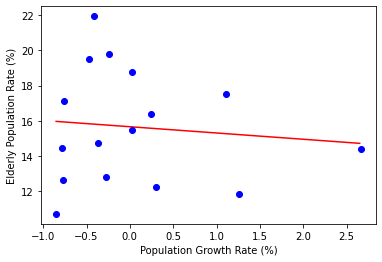

In [6]:
# Tensorflow를 이용하여 구현

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# Initialize a, b with random values.
a = tf.Variable(random.random()) 
b = tf.Variable(random.random())

# Return mean value of residual squares.
def compute_loss():
    y_pred = a * X + b
    loss = tf.reduce_mean((Y - y_pred) ** 2)  # tf.reduce_mean : return mean value
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07) 
for i in range(1000):
    # Minimize mean value of residual squares.
    optimizer.minimize(compute_loss, var_list=[a, b])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())
        
line_x = np.arange(min(X), max(X), 0.01) 
line_y = a * line_x + b

# Plot a graph
plt.plot(line_x,line_y,'r--') 
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)') 
plt.ylabel('Elderly Population Rate (%)') 
plt.show()

> [Adam 최적화 함수](https://arxiv.org/pdf/1412.6980.pdf)

In [12]:
# 신경망을 이용해 문제 해결

import tensorflow as tf
import numpy as np
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)), 
        tf.keras.layers.Dense(units=1)
])
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse') 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Train the model
model.fit(X, Y, epochs=10)    

Train on 16 samples
Epoch 1/10
16/16 [==============================] - 1s 46ms/sample - loss: 255.3449
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 99.4700
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 11.2228
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 9.7249
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 9.4797
Epoch 6/10
16/16 [==============================] - 0s 8ms/sample - loss: 9.4296
Epoch 7/10
16/16 [==============================] - 0s 4ms/sample - loss: 9.4021
Epoch 8/10
16/16 [==============================] - 0s 4ms/sample - loss: 9.3758
Epoch 9/10
16/16 [==============================] - 0s 3ms/sample - loss: 9.3470
Epoch 10/10
16/16 [==============================] - 0s 4ms/sample - loss: 9.3145


In [14]:
# Predict the model
model.predict(X)

array([[16.19548  ],
       [15.373272 ],
       [15.432862 ],
       [16.157986 ],
       [15.639523 ],
       [16.19683  ],
       [16.007048 ],
       [15.788388 ],
       [15.388516 ],
       [15.89349  ],
       [15.263723 ],
       [15.8532715],
       [15.9831915],
       [16.154434 ],
       [15.403653 ],
       [13.326104 ]], dtype=float32)

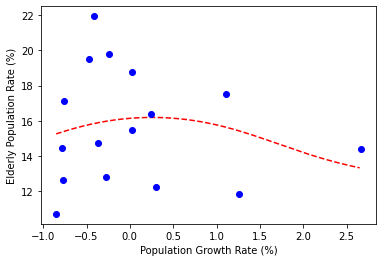

In [16]:
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x,line_y,'r--') 
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)') 
plt.ylabel('Elderly Population Rate (%)')
plt.show()